In [1]:
import os 
import pandas as pd 
import numpy as np 

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:

os.chdir(r'C:\Users\adith\OneDrive\Desktop\FERTILIZER_PREDICTION_ML-MAIN')


df = pd.read_csv('Fertilizer_Prediction.csv')

In [3]:
display(df.head(10))

,Temperature,Humidity,Rainfall,pH,N,P,K,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,6.59,4.0,2.0,2.5,Clayey,rice,DAP and MOP
1,28.69,96.65,178.96,6.08,4.0,4.0,4.0,laterite,Coconut,Good NPK
2,20.27,81.64,270.44,5.01,4.0,4.0,2.0,silty clay,rice,MOP
3,25.07,95.02,192.90,5.55,2.0,2.1,3.5,sandy,Coconut,Urea and DAP
4,25.04,95.90,174.80,6.18,2.0,3.9,2.1,coastal,Coconut,Urea and MOP
5,20.82,84.13,230.22,6.46,2.5,4.0,3.0,clay loam,rice,Urea
6,25.95,93.41,172.05,5.84,2.5,4.0,2.0,alluvial,Coconut,Urea and MOP
7,26.49,80.16,242.86,6.98,4.2,2.3,3.2,Clayey,rice,DAP
8,25.01,95.59,165.81,6.00,2.0,3.9,2.1,coastal,Coconut,Urea and MOP
9,21.87,80.19,224.56,5.95,2.9,3.5,3.9,silty clay,rice,Urea


In [4]:
df.columns

Index(['Temperature', 'Humidity', 'Rainfall', 'pH', 'N', 'P', 'K', 'Soil',
       'Crop', 'Fertilizer'],
      dtype='object')

In [5]:

print(df.shape)

display(df.info())

(200, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  200 non-null    float64
 1   Humidity     200 non-null    float64
 2   Rainfall     200 non-null    float64
 3   pH           200 non-null    float64
 4   N            200 non-null    float64
 5   P            200 non-null    float64
 6   K            200 non-null    float64
 7   Soil         200 non-null    object 
 8   Crop         200 non-null    object 
 9   Fertilizer   200 non-null    object 
dtypes: float64(7), object(3)
memory usage: 15.8+ KB


None

In [6]:

df.isnull().sum()

Temperature    0
Humidity       0
Rainfall       0
pH             0
N              0
P              0
K              0
Soil           0
Crop           0
Fertilizer     0
dtype: int64

In [7]:

display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Temperature,200.0,25.55720,2.544626,20.05,23.8200,25.975,27.310,29.87
Humidity,200.0,88.56315,6.636224,80.12,82.2250,87.495,94.930,99.98
Rainfall,200.0,206.07385,43.954794,131.09,172.3725,203.435,233.115,298.56
pH,200.0,6.21130,0.622228,5.01,5.7600,6.125,6.440,7.87
N,200.0,3.11550,0.910193,2.00,2.2000,2.500,4.000,4.20
P,200.0,3.13050,0.929213,2.00,2.0750,3.900,4.000,4.00
K,200.0,2.95600,0.721364,1.90,2.1000,3.000,3.500,4.00


In [8]:

display(df.describe(include='object'))

,Soil,Crop,Fertilizer
count,200,200,200
unique,7,2,7
top,silty clay,rice,Urea and MOP
freq,42,100,42


In [9]:
import matplotlib.pyplot as plt

import seaborn as sns 

from dython import nominal

In [10]:

print("There are seven class in Fertilizer: ", df['Fertilizer'].unique())

There are seven class in Fertilizer:  ['DAP and MOP' 'Good NPK' 'MOP' 'Urea and DAP' 'Urea and MOP' 'Urea '
 'DAP']


<Axes: xlabel='count', ylabel='Fertilizer'>

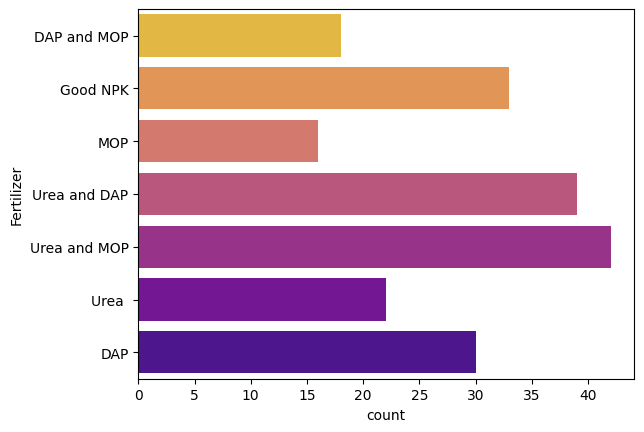

In [11]:

sns.countplot(y='Fertilizer',data=df,palette="plasma_r")

In [12]:

def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Distogram')
    sns.distplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with target variable')
    sns.boxplot(y = x,x = df['Fertilizer'])

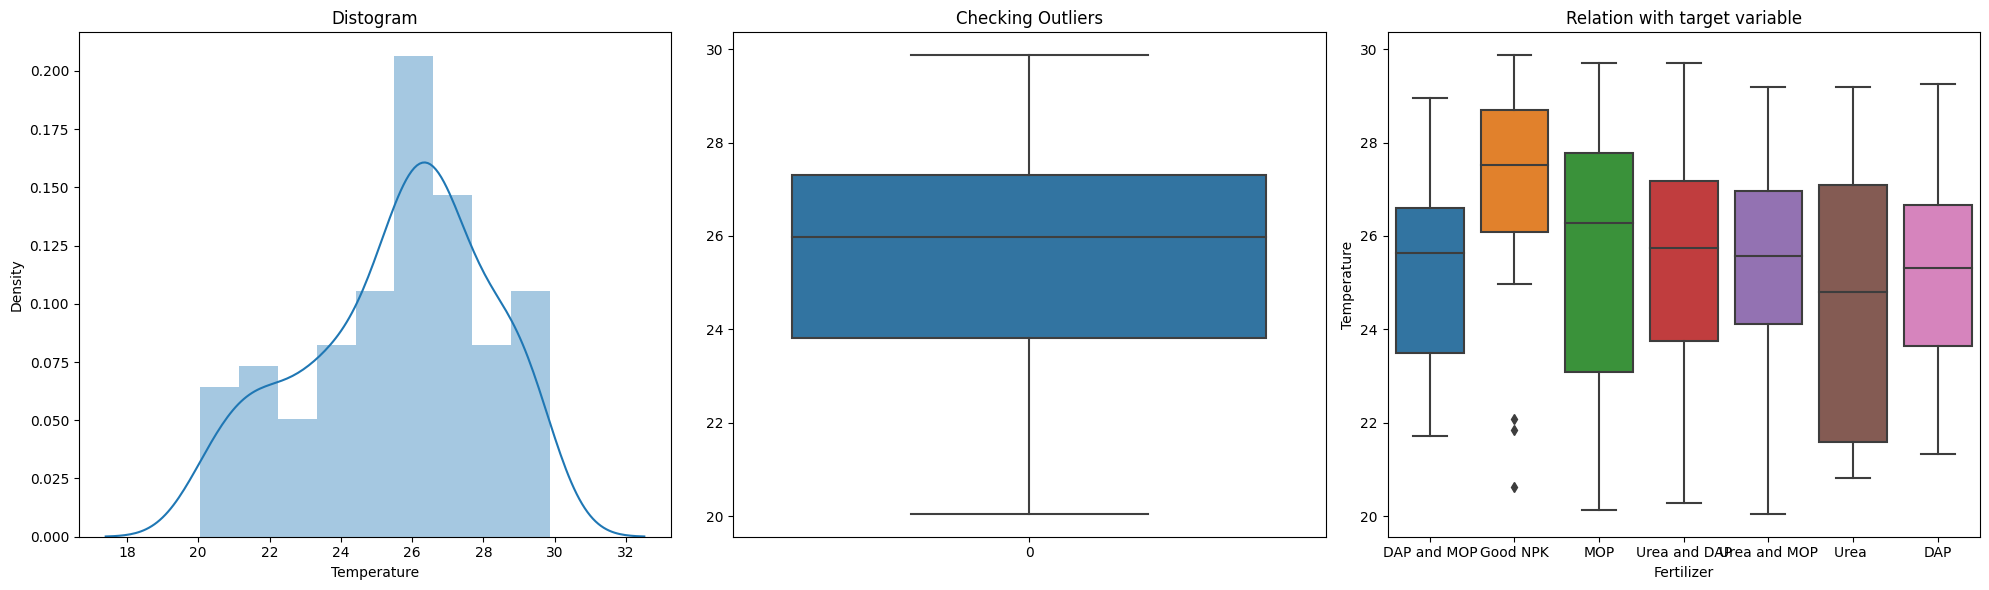

In [13]:

plot_conti(df['Temperature'])

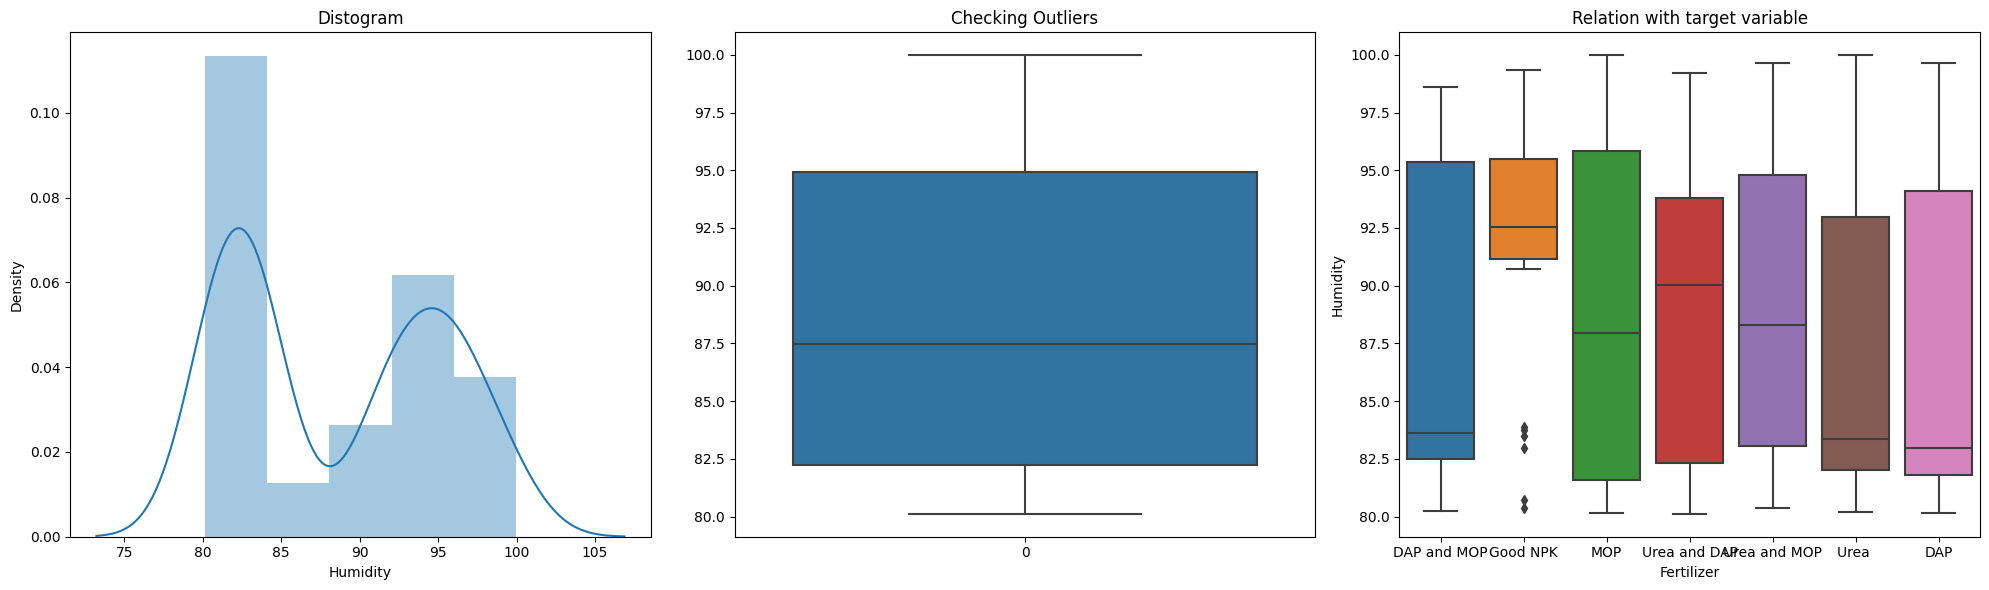

In [14]:

plot_conti(df['Humidity'])

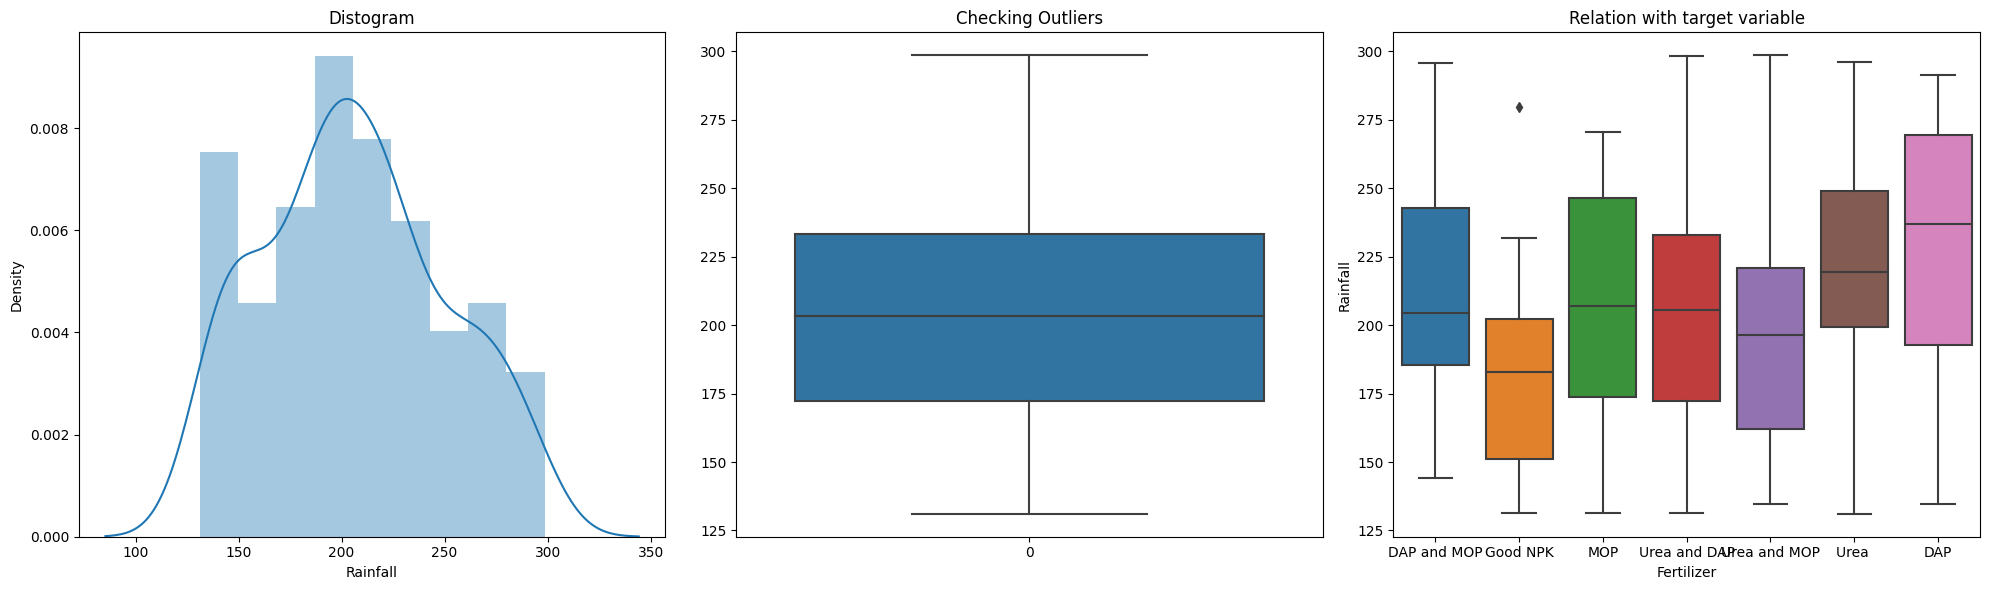

In [15]:

plot_conti(df['Rainfall'])

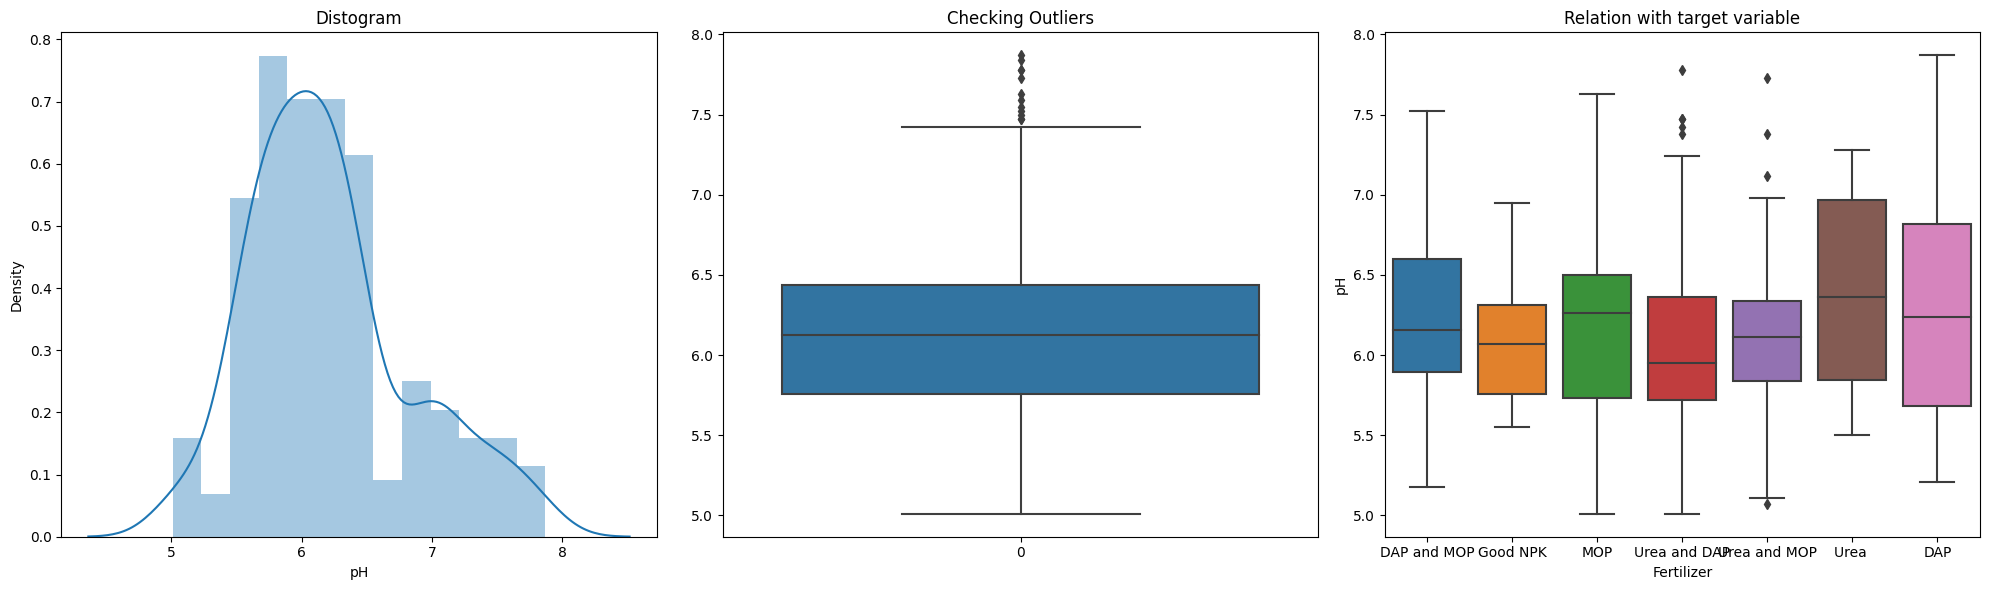

In [16]:

plot_conti(df['pH'])

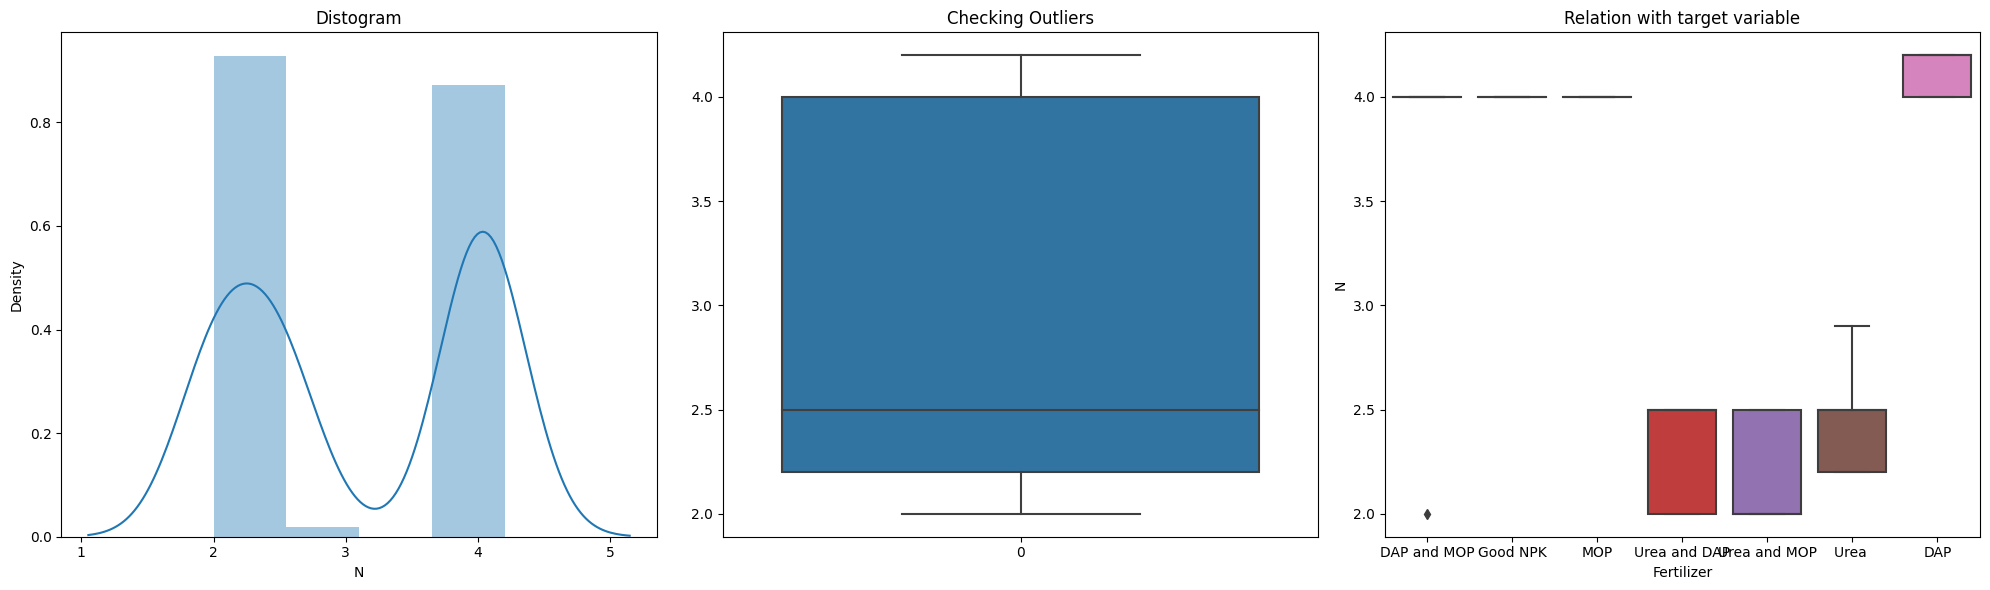

In [17]:

plot_conti(df['N'])

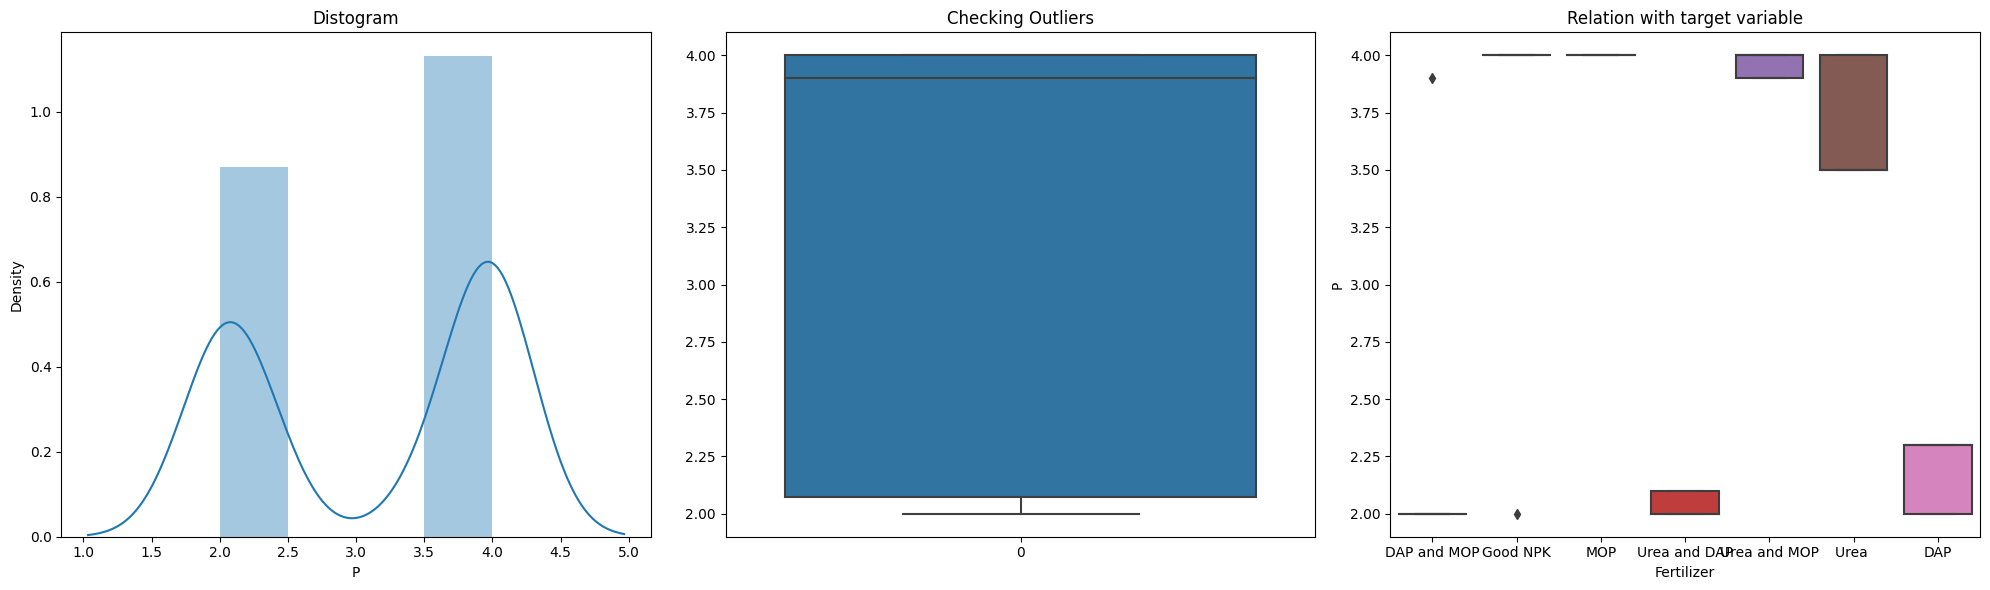

In [18]:

plot_conti(df['P'])

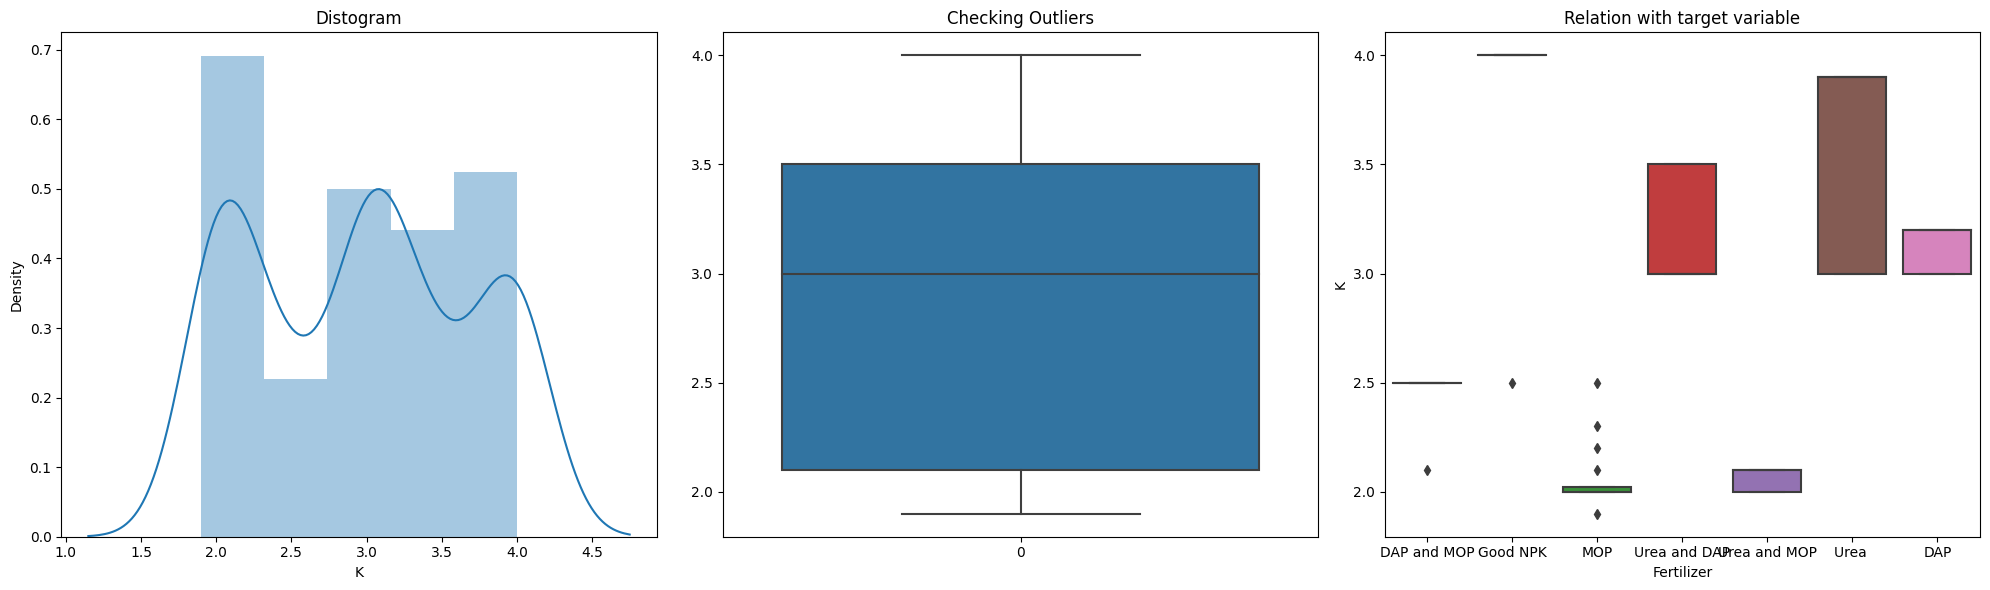

In [19]:

plot_conti(df['K'])

In [20]:

def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x=x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Fertilizer'], ax=axes[1])

In [21]:

print("Soil : ", df['Soil'].unique())

Soil :  ['Clayey' 'laterite' 'silty clay' 'sandy' 'coastal' 'clay loam' 'alluvial']


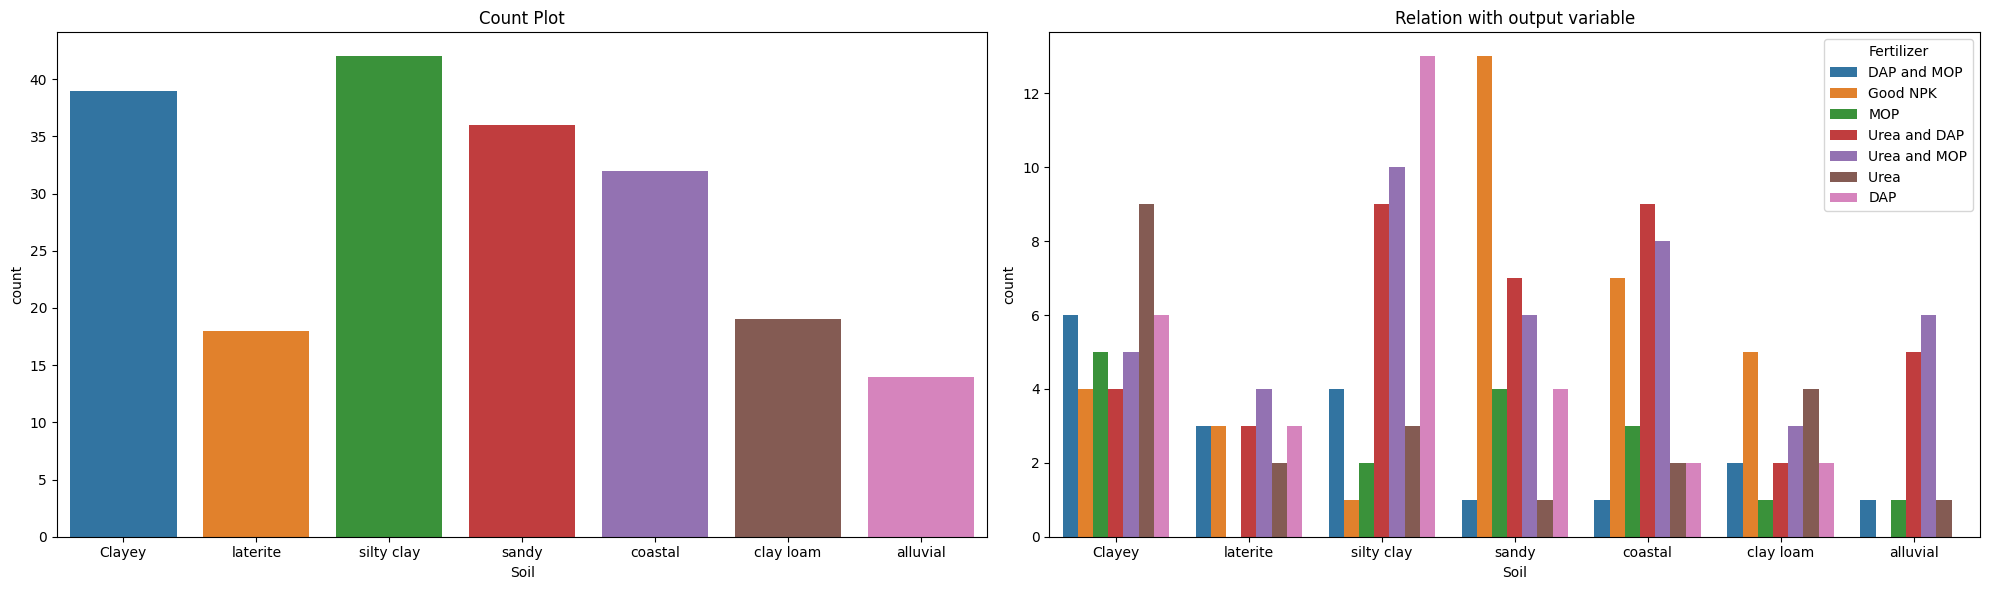

In [22]:

plot_cato(df['Soil'])

In [23]:

print("Crop: ", df['Crop'].unique())

Crop:  ['rice' 'Coconut']


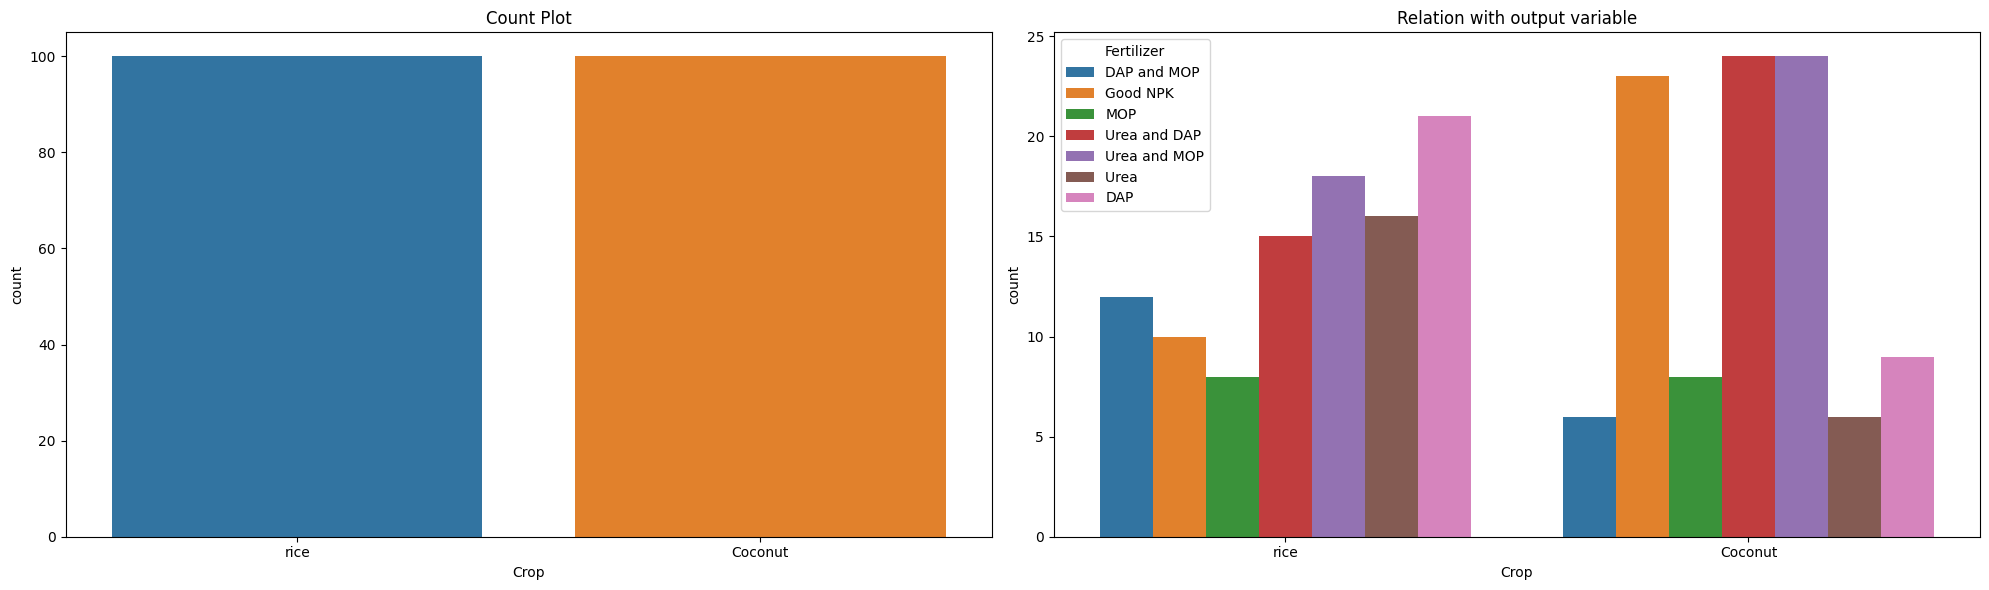

In [24]:
plot_cato(df['Crop'])

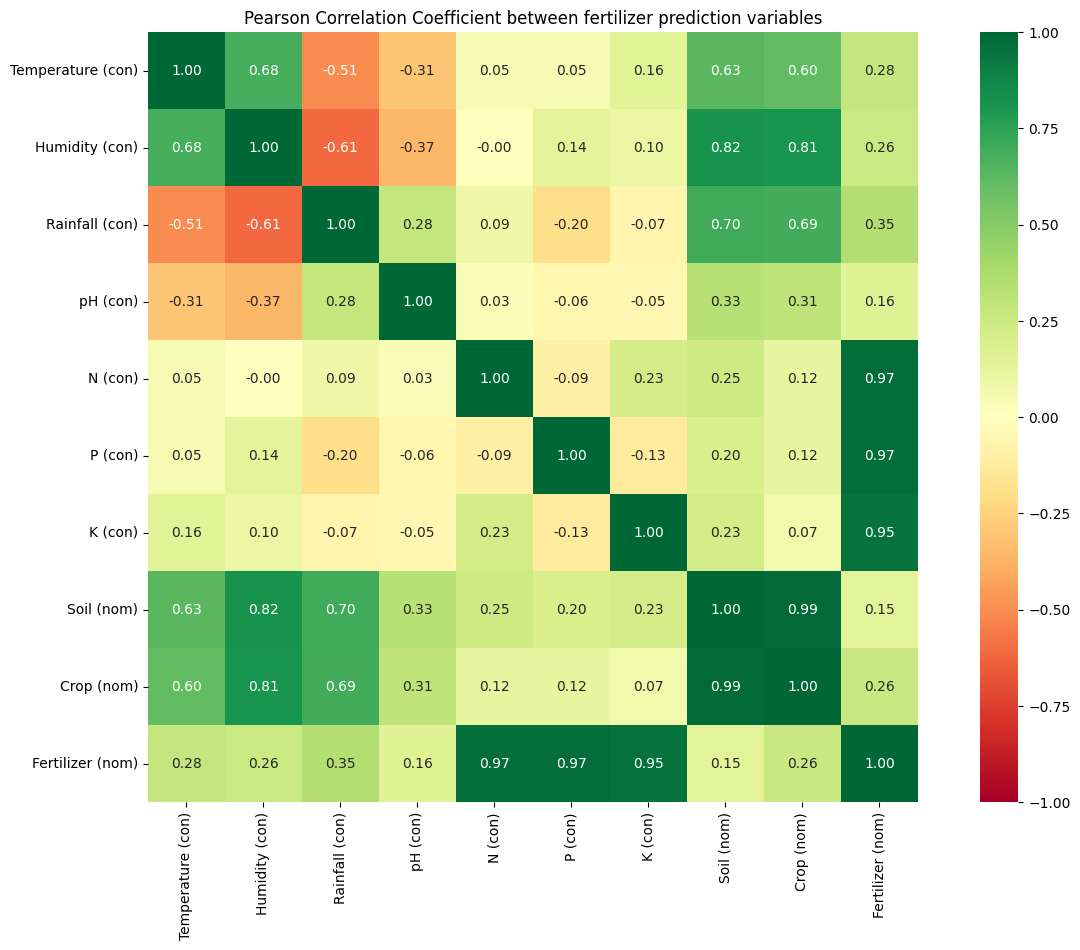

{'corr':                    Temperature (con)  Humidity (con)  Rainfall (con)  \
 Temperature (con)           1.000000        0.683385       -0.505754   
 Humidity (con)              0.683385        1.000000       -0.614205   
 Rainfall (con)             -0.505754       -0.614205        1.000000   
 pH (con)                   -0.305519       -0.365192        0.282530   
 N (con)                     0.052297       -0.002303        0.086501   
 P (con)                     0.052717        0.136661       -0.200266   
 K (con)                     0.155975        0.104165       -0.070109   
 Soil (nom)                  0.628264        0.816603        0.700433   
 Crop (nom)                  0.603367        0.807215        0.689128   
 Fertilizer (nom)            0.276094        0.255053        0.350946   
 
                    pH (con)   N (con)   P (con)   K (con)  Soil (nom)  \
 Temperature (con) -0.305519  0.052297  0.052717  0.155975    0.628264   
 Humidity (con)    -0.365192 -0.002303 

In [25]:
nominal.associations(df,figsize=(16,10),
                     mark_columns=True,
                     title="Pearson Correlation Coefficient between fertilizer prediction variables",
                     cmap='RdYlGn')

In [26]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 

In [27]:
 le = LabelEncoder()
df['Fertilizer']= le.fit_transform(df['Fertilizer'])
df['Soil']= le.fit_transform(df['Soil'])
df['Crop']= le.fit_transform(df['Crop'])

In [28]:
X = df.drop(['Crop','Fertilizer'], axis=1)  
y = df[['Fertilizer']]  
y2=df[['Crop']]

print('The shape of feature set, X is', X.shape)
print('The shape of target, y is', y.shape)
print('The shape of 2nd target, y2 is', y2.shape)


The shape of feature set, X is (200, 8)
The shape of target, y is (200, 1)
The shape of 2nd target, y2 is (200, 1)


In [29]:
display(df.head())

,Temperature,Humidity,Rainfall,pH,N,P,K,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,6.59,4.0,2.0,2.5,0,1,1
1,28.69,96.65,178.96,6.08,4.0,4.0,4.0,4,0,2
2,20.27,81.64,270.44,5.01,4.0,4.0,2.0,6,1,3
3,25.07,95.02,192.90,5.55,2.0,2.1,3.5,5,0,5
4,25.04,95.90,174.80,6.18,2.0,3.9,2.1,3,0,6


In [30]:
scaler = MinMaxScaler()
for col in X.columns:
    X[col] = scaler.fit_transform(X[[col]])

display(X.sample(10))

,Temperature,Humidity,Rainfall,pH,N,P,K,Soil
57,0.772912,0.968278,0.160208,0.479021,0.909091,1.00,1.000000,0.833333
75,0.387984,0.106244,0.382158,0.828671,0.000000,1.00,0.095238,0.166667
72,0.565173,0.001511,0.416433,0.660839,0.909091,1.00,0.047619,1.000000
117,0.547862,0.142497,0.383770,0.262238,0.909091,1.00,1.000000,1.000000
26,0.715886,0.849950,0.242849,0.328671,0.227273,0.00,0.523810,0.166667
55,0.635438,0.224068,0.754762,0.702797,0.090909,0.75,0.952381,0.333333
199,0.384929,0.236153,1.000000,0.440559,0.227273,1.00,0.047619,1.000000
183,0.101833,0.128902,0.609184,0.433566,0.227273,0.00,0.523810,1.000000
70,0.924644,0.563444,0.156147,0.255245,0.909091,1.00,1.000000,0.833333
76,0.700611,0.090131,0.952947,0.720280,0.090909,0.75,0.952381,0.333333


In [31]:

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)



print('Shape of X_train is', X_train.shape)
print('Shape of X_test is', X_test.shape)
print('Shape of y_train is', y_train.shape)
print('Shape of y_test is',  y_test.shape)


Shape of X_train is (140, 8)
Shape of X_test is (60, 8)
Shape of y_train is (140, 1)
Shape of y_test is (60, 1)


In [32]:

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree 
from sklearn.model_selection import GridSearchCV 

from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import classification_report 
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix

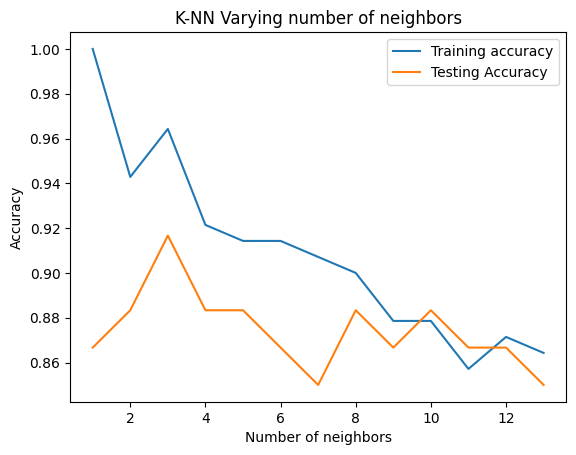

In [33]:
neighbors = np.arange(1,14)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy[i] = knn.score(X_train, y_train)
        test_accuracy[i] = knn.score(X_test, y_test)
plt.title('K-NN Varying number of neighbors')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [34]:
model_knn = KNeighborsClassifier(n_neighbors=3)

model_knn = model_knn.fit(X_train, y_train)

In [35]:
y_pred_knn = model_knn.predict(X_test)

In [36]:
print('Accuracy of K-Nearest Neighbor Model: ', accuracy_score(y_test, y_pred_knn))

Accuracy of K-Nearest Neighbor Model:  0.9166666666666666


In [37]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, 
                                                    y2, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y2)

In [38]:
print('Shape of X_train is', X2_train.shape)
print('Shape of X_test is', X2_test.shape)
print('Shape of y_train is', y2_train.shape)
print('Shape of y_test is',  y2_test.shape)

Shape of X_train is (140, 8)
Shape of X_test is (60, 8)
Shape of y_train is (140, 1)
Shape of y_test is (60, 1)


In [39]:
model2_knn=model_knn.fit(X2_train,y2_train)
y2_pred_knn=model2_knn.predict(X2_test)

print('Accuracy of K-Nearest Neighbor Model: ', accuracy_score(y2_test, y2_pred_knn))

Accuracy of K-Nearest Neighbor Model:  0.9333333333333333


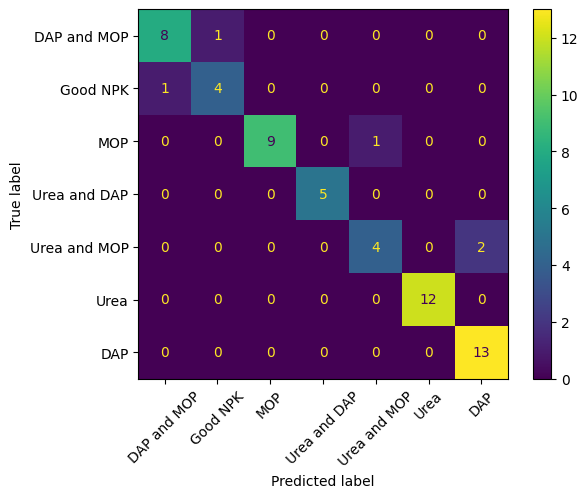

In [40]:
abcd=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_knn), 
                      display_labels=['DAP and MOP','Good NPK','MOP','Urea and DAP','Urea and MOP','Urea','DAP'],
                      
                      )
abcd.cmap = cm.Blues
abcd.plot()
plt.xticks(rotation=45)
plt.show()

In [41]:

print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.80      0.80      0.80         5
           2       1.00      0.90      0.95        10
           3       1.00      1.00      1.00         5
           4       0.80      0.67      0.73         6
           5       1.00      1.00      1.00        12
           6       0.87      1.00      0.93        13

    accuracy                           0.92        60
   macro avg       0.91      0.89      0.90        60
weighted avg       0.92      0.92      0.92        60



In [42]:

model_DT = DecisionTreeClassifier(random_state=42)
model_DT = model_DT.fit(X_train, y_train)
y_pred_DT = model_DT.predict(X_test)

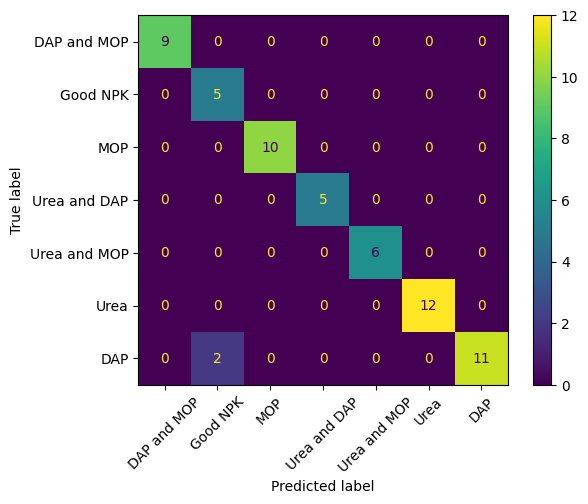

In [43]:

import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix
disp=ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_DT),
                      display_labels=['DAP and MOP','Good NPK','MOP','Urea and DAP','Urea and MOP','Urea','DAP'],
                      
                      
                      )
disp.cmap = cm.Blues
disp.plot()
plt.xticks(rotation=45)
plt.show()

In [44]:

print('Accuracy: ', accuracy_score(y_test, y_pred_DT))

print(classification_report(y_test, y_pred_DT))

Accuracy:  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        12
           6       1.00      0.85      0.92        13

    accuracy                           0.97        60
   macro avg       0.96      0.98      0.96        60
weighted avg       0.98      0.97      0.97        60



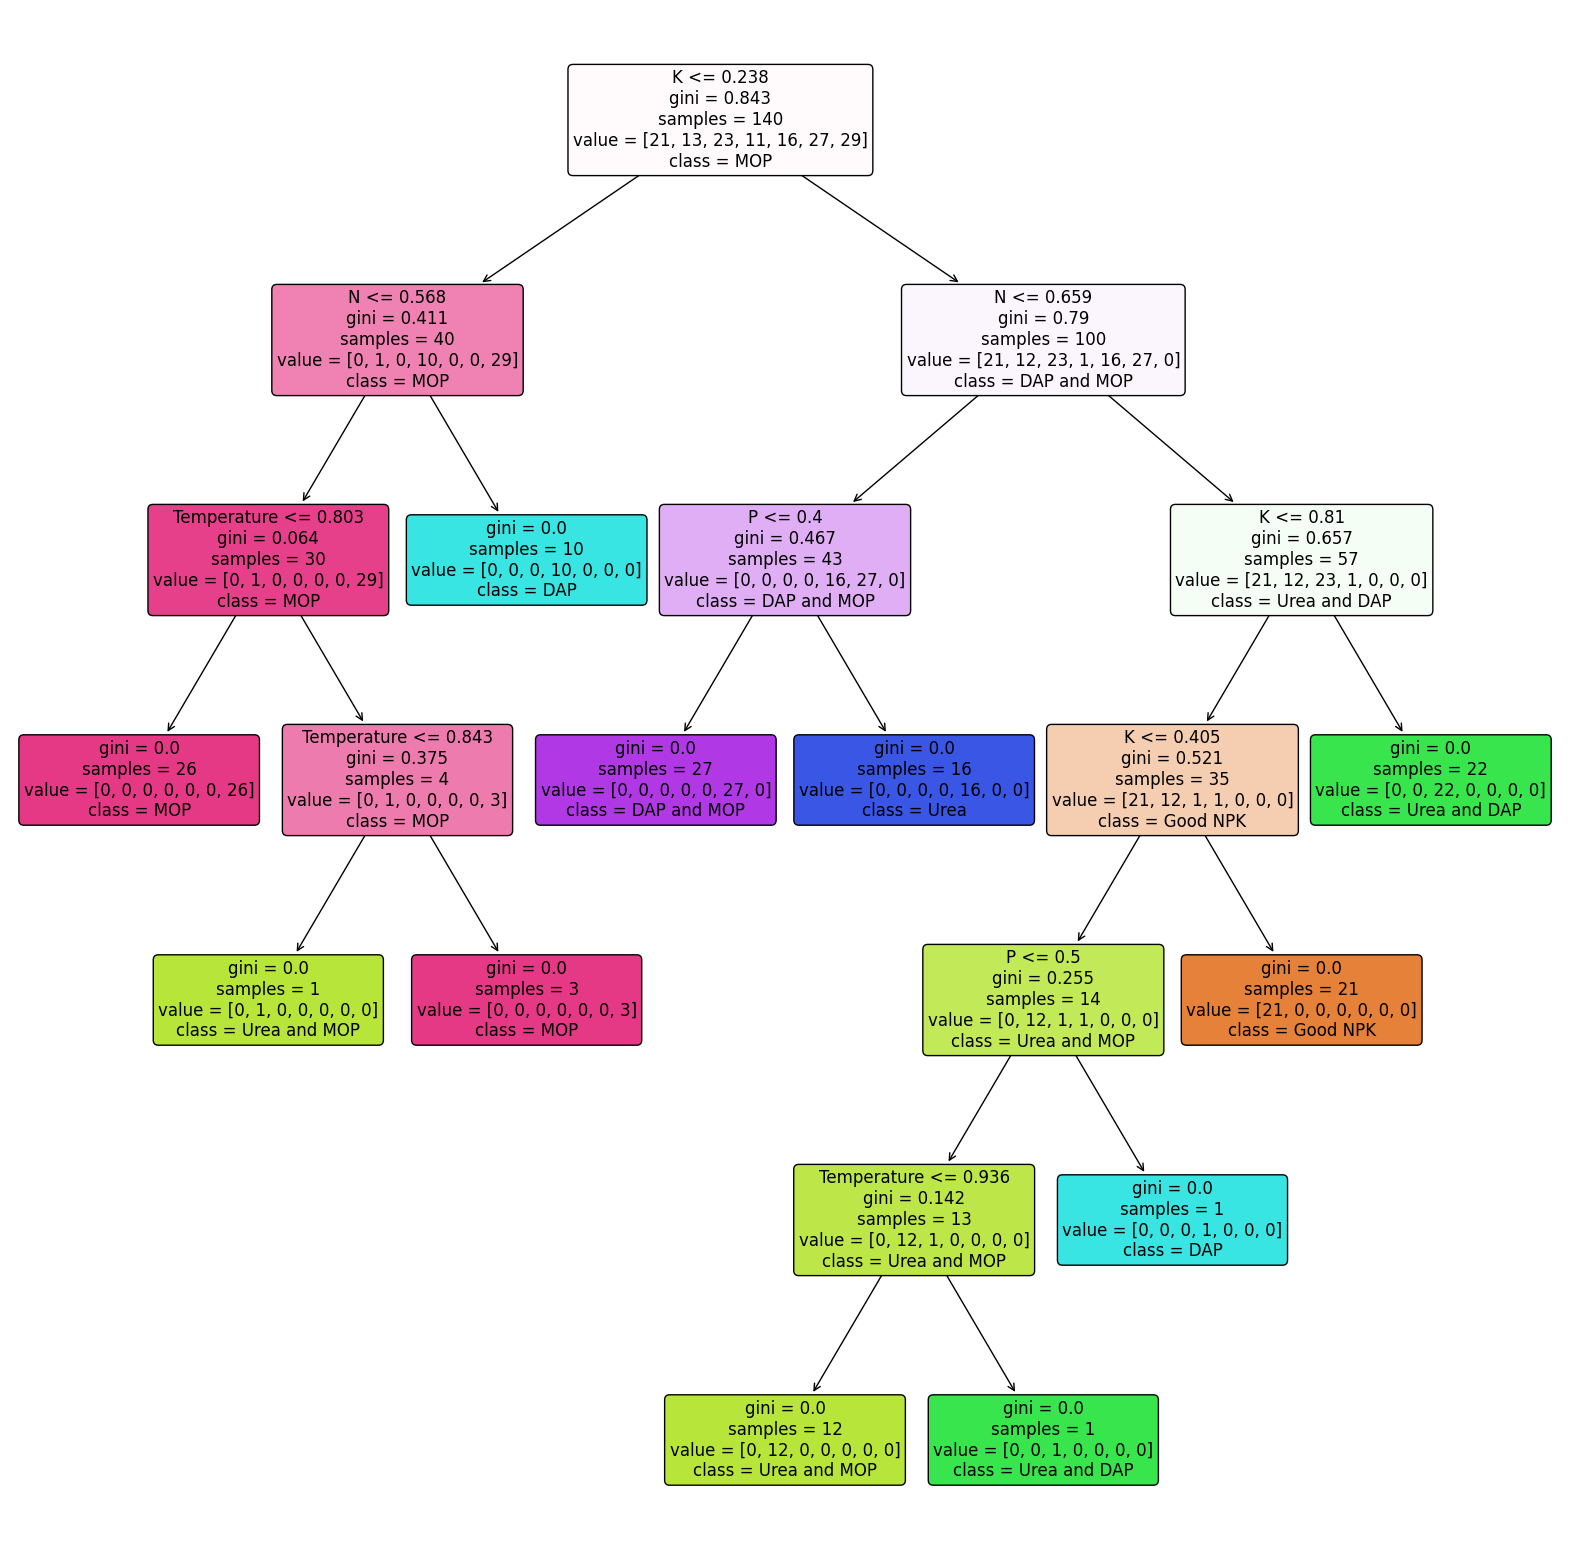

In [45]:

plt.figure(figsize = (20, 20))
plot_tree(model_DT, 
        filled=True,
        rounded=True,
        class_names = ['Good NPK', 'Urea and MOP','Urea and DAP', 'DAP','Urea', 'DAP and MOP', 'MOP'],
        feature_names = list(X.columns),
        fontsize=12)

plt.show()

In [46]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

grid_search_DT = GridSearchCV(estimator=model_DT,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

In [47]:

grid_result_DT = grid_search_DT.fit(X_train, y_train)

In [48]:

grid_result_DT.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [49]:
cv_result = pd.DataFrame(grid_result_DT.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,entropy,4,1.000000,1.000000,0.964286,0.928571,1.000000,0.978571,0.028571,1
7,entropy,5,1.000000,1.000000,0.964286,0.928571,1.000000,0.978571,0.028571,1
8,entropy,6,1.000000,1.000000,0.964286,0.928571,1.000000,0.978571,0.028571,1
9,entropy,7,1.000000,1.000000,0.964286,0.928571,1.000000,0.978571,0.028571,1
1,gini,4,1.000000,1.000000,0.928571,0.928571,1.000000,0.971429,0.034993,5
2,gini,5,1.000000,1.000000,0.928571,0.928571,1.000000,0.971429,0.034993,5
3,gini,6,1.000000,1.000000,0.928571,0.928571,1.000000,0.971429,0.034993,5
4,gini,7,1.000000,1.000000,0.928571,0.928571,1.000000,0.971429,0.034993,5
5,entropy,3,1.000000,1.000000,0.928571,0.928571,1.000000,0.971429,0.034993,5
0,gini,3,0.785714,0.892857,0.785714,0.750000,0.928571,0.828571,0.069253,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [50]:
y_pred_Grid = grid_result_DT.predict(X_test)

In [51]:
print('Accuracy: ', accuracy_score(y_test, y_pred_Grid))
print(classification_report(y_test, y_pred_Grid))

Accuracy:  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        12
           6       1.00      0.85      0.92        13

    accuracy                           0.97        60
   macro avg       0.96      0.98      0.96        60
weighted avg       0.98      0.97      0.97        60



In [52]:

model_RF = RandomForestClassifier(random_state=42)
model_RF = model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

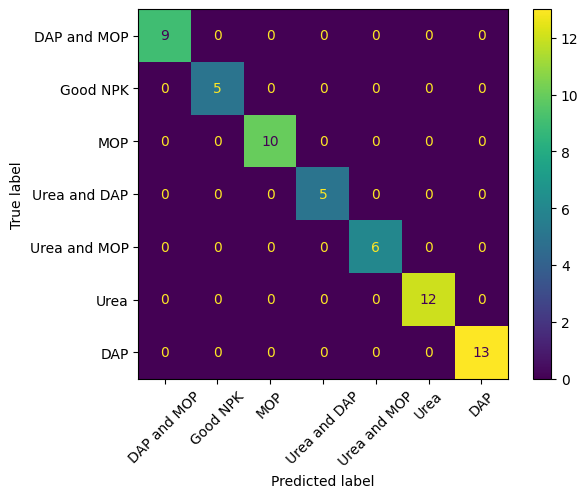

In [53]:
xy=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_RF),
                      display_labels=['DAP and MOP','Good NPK','MOP','Urea and DAP','Urea and MOP','Urea','DAP']
                      )
xy.cmap = cm.Blues
xy.plot()
plt.xticks(rotation=45)
plt.show()

In [54]:

print('Accuracy: ', accuracy_score(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        13

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [55]:
model2_RF = RandomForestClassifier(random_state=42)


model2_RF = model2_RF.fit(X2_train, y2_train)

y2_pred_RF = model2_RF.predict(X2_test)

In [56]:
print('Accuracy: ', accuracy_score(y2_test, y2_pred_RF))


print(classification_report(y2_test, y2_pred_RF))

Accuracy:  0.95
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.97      0.93      0.95        30

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [57]:

model_GB = GradientBoostingClassifier()


model_GB = model_GB.fit(X_train, y_train)

In [58]:

y_pred_GB = model_GB.predict(X_test)

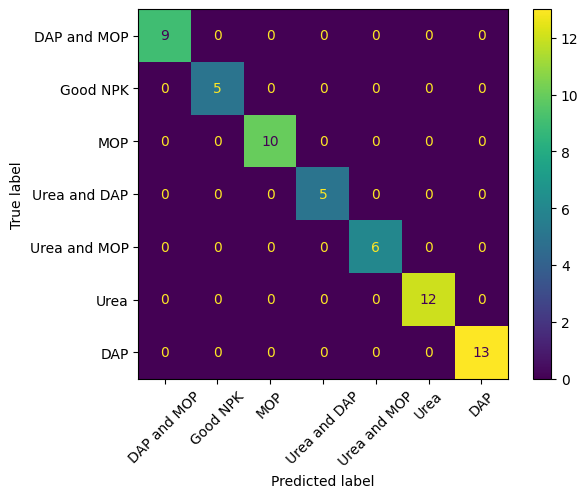

In [59]:

yz=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_GB),
                      display_labels=['DAP and MOP','Good NPK','MOP','Urea and DAP','Urea and MOP','Urea','DAP'],
                      )
yz.cmap = cm.Blues


yz.plot()


plt.xticks(rotation=45)
plt.show()


In [60]:

print('Accuracy: ', accuracy_score(y_test, y_pred_GB))


print(classification_report(y_test, y_pred_GB))

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        13

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [61]:
model2_GB = GradientBoostingClassifier()


model2_GB = model2_GB.fit(X2_train, y2_train)

In [62]:
y2_pred_GB = model2_GB.predict(X2_test)


In [63]:
print('Accuracy: ', accuracy_score(y2_test, y2_pred_GB))


print(classification_report(y2_test, y2_pred_GB))

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [64]:
print("Model\t\t\tAccuracy of the model") 
print("""K-Nearest Neighbors\t\t {:.4f}""".format( accuracy_score(y_test, y_pred_knn)))
print("""Decision Tree\t\t\t {:.4f}""".format(accuracy_score(y_test, y_pred_DT)))
print("""Random Forest\t\t\t {:.4f}""".format(accuracy_score(y_test, y_pred_RF)))
print("""Gradient Boosting\t\t {:.4f}""".format( accuracy_score(y_test, y_pred_GB)))

Model			Accuracy of the model
K-Nearest Neighbors		 0.9167
Decision Tree			 0.9667
Random Forest			 1.0000
Gradient Boosting		 1.0000


In [65]:
df # Displaying dataset again

,Temperature,Humidity,Rainfall,pH,N,P,K,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,6.59,4.0,2.0,2.5,0,1,1
1,28.69,96.65,178.96,6.08,4.0,4.0,4.0,4,0,2
2,20.27,81.64,270.44,5.01,4.0,4.0,2.0,6,1,3
3,25.07,95.02,192.90,5.55,2.0,2.1,3.5,5,0,5
4,25.04,95.90,174.80,6.18,2.0,3.9,2.1,3,0,6
...,...,...,...,...,...,...,...,...,...,...
195,23.58,83.59,291.30,5.85,4.0,2.0,3.0,6,1,0
196,25.66,83.47,217.38,7.12,2.0,3.9,2.1,0,1,6
197,24.17,83.73,257.03,5.58,2.0,2.1,3.5,6,1,5
198,26.23,83.84,286.51,5.54,4.2,2.3,3.2,6,1,0


In [66]:
import pandas as pd
from sklearn.cluster import KMeans

data = pd.read_csv('Fertilizer_Prediction.csv') 
le = LabelEncoder()

data['Soil']= le.fit_transform(df['Soil'])

X = data[['Temperature', 'Humidity', 'Rainfall', 'pH', 'N', 'P', 'K','Soil']]


num_clusters = 3


kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)


labels = kmeans.labels_


data['Cluster'] = labels


print(data['Cluster'].value_counts())

Cluster
2    95
0    57
1    48
Name: count, dtype: int64


In [67]:
fertiiiii={0:"DAP,Urea and Good NPK",1:"DAP and MOP",2:"Good(60%) NPK",3:"Urea and MOP",4:"Urea and DAP",5:"MOP",6:"Urea",7:"DAP"}
cropppp={0:"Coconut",1:"Rice"}
fertili={0:"Unfertile",1:"Fertile",2:"Contaminated"}


In [68]:

data = np.array([[28.69, 96.65, 178.96, 6.08, 4.0, 4.0, 4.0, 4]])
prediction = model_knn.predict(data)
pred2=model2_knn.predict(data)
predicted_cluster = kmeans.predict(data)
#if int(prediction)<3:
 #   print("The soil is unfertile")
#elif int(prediction)<5 and int(prediction)>2:
 #   print("The soil id moderately fertile and free of chemicals")
#else:
 #   print("The soil is contaminated,use reduced quantity of ")
print(f"Suggested fertilizer is {fertiiiii[int(prediction)]}")
print(f"Suggested crop is {cropppp[int(pred2)]}\n\n")
print("The soil is :", fertili[int(predicted_cluster)])
if fertili[int(predicted_cluster)]== "Unfertile":
    print("Use 500 gram of "+fertiiiii[int(prediction)]+ " per year")
elif fertili[int(predicted_cluster)]== "Fertile":
    print("Use 250 gram of "+fertiiiii[int(prediction)]+ " per year")
elif fertili[int(predicted_cluster)]== "Contaminated":
    print("Use less than 75 gram of "+fertiiiii[int(prediction)]+ " per year")

Suggested fertilizer is DAP,Urea and Good NPK
Suggested crop is Coconut


The soil is : Unfertile
Use 500 gram of DAP,Urea and Good NPK per year


In [69]:

data = np.array([[10000,200,3000,424,546,6346,7633, 1]])
prediction = grid_result_DT.predict(data)
pred2=model2_GB.predict(data)
predicted_cluster = kmeans.predict(data)
#if int(prediction)<2:
 #   print("The soil is unfertile")
#elif int(prediction)<5 and int(prediction)>=2:
 #   print("The soil id moderately fertile and free of chemicals")
#else:
 #  print("The soil is contaminated,use reduced quantity of ")
print(f"Suggested fertilizer is: {fertiiiii[int(prediction)]}")
print(f"Suggested crop is {cropppp[int(pred2)]}\n\n")
print("The soil is :", fertili[int(predicted_cluster)])
if fertili[int(predicted_cluster)]== "Unfertile":
    print("Use 500 gram of "+fertiiiii[int(prediction)]+ " per year")
elif fertili[int(predicted_cluster)]== "Fertile":
    print("Use 250 gram of "+fertiiiii[int(prediction)]+ " per year")
elif fertili[int(predicted_cluster)]== "Contaminated":
    print("Use less than 75 gram of "+fertiiiii[int(prediction)]+ " per year")

Suggested fertilizer is: Good(60%) NPK
Suggested crop is Rice


The soil is : Fertile
Use 250 gram of Good(60%) NPK per year


In [70]:

data = np.array([[26.61,96.97,191.01,6.14,4,2,2.5,1.56]])
prediction = model_RF.predict(data)
pred2=model2_RF.predict(data)
predicted_cluster = kmeans.predict(data)
#if int(prediction)<3:
 #   print("The soil is unfertile")
#elif int(prediction)<5 and int(prediction)>2:
 #   print("The soil id moderately fertile and free of chemicals")
#else:
 #   print("The soil is contaminated,use reduced quantity of ")
print(f"Suggested fertilizer is {fertiiiii[int(prediction)]}")
print(f"Suggested crop is {cropppp[int(pred2)]}\n\n")
print("The soil is :", fertili[int(predicted_cluster)])
if fertili[int(predicted_cluster)]== "Unfertile":
    print("Use 500 gram of "+fertiiiii[int(prediction)]+ " per year")
elif fertili[int(predicted_cluster)]== "Fertile":
    print("Use 250 gram of "+fertiiiii[int(prediction)]+ " per year")
elif fertili[int(predicted_cluster)]== "Contaminated":
    print("Use less than 75 gram of "+fertiiiii[int(prediction)]+ " per year")

Suggested fertilizer is Good(60%) NPK
Suggested crop is Rice


The soil is : Contaminated
Use less than 75 gram of Good(60%) NPK per year


In [71]:

data = np.array([[0,0,0,0,0,0,0,0]])
prediction = model_GB.predict(data)
pred2=model2_GB.predict(data)
predicted_cluster = kmeans.predict(data)


#if int(prediction)<3:
 #   print("The soil is unfertile")
#elif int(prediction)<5 and int(prediction)>2:
 #   print("The soil id moderately fertile and free of chemicals")
#else:
 #   print("The soil is contaminated,use less fertilizer ")
print(f"suggested fertilizer is: {fertiiiii[int(prediction)]}")
print(f"Suggested crop is {cropppp[int(pred2)]}")
print()
print("The soil is :", fertili[int(predicted_cluster)])
if fertili[int(predicted_cluster)]== "Unfertile":
    print("Use 500 gram of "+fertiiiii[int(prediction)]+ " per year")
elif fertili[int(predicted_cluster)]== "Fertile":
    print("Use 250 gram of "+fertiiiii[int(prediction)]+ " per year")
elif fertili[int(predicted_cluster)]== "Contaminated":
    print("Use less than 75 gram of "+fertiiiii[int(prediction)]+ " per year")


suggested fertilizer is: MOP
Suggested crop is Rice

The soil is : Unfertile
Use 500 gram of MOP per year
